In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# from ast import literal_eval

In [2]:
data=pd.read_csv('complaints.csv')

# Explanatory Data Analysis

In [3]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Problem with a company's investigation into an...,Problem with personal statement of dispute,NaN,NaN,AMERICAN EXPRESS COMPANY,FL,33147,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7443406
1,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,PA,19061,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7443461
2,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,AL,35756,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7443505
3,2023-08-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,NaN,NaN,"Nelnet, Inc.",GA,30009,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7443381
4,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,Experian Information Solutions Inc.,NC,283XX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7443451


In [4]:
data.shape

(4055791, 18)

In [5]:
a=data.Product.nunique()
b=data['Product'].unique()
print(a)
print(b)

21
['Credit reporting, credit repair services, or other personal consumer reports'
 'Student loan' 'Credit reporting or other personal consumer reports'
 'Debt collection' 'Credit card or prepaid card'
 'Checking or savings account' 'Payday loan, title loan, or personal loan'
 'Credit card' 'Mortgage'
 'Money transfer, virtual currency, or money service'
 'Payday loan, title loan, personal loan, or advance loan'
 'Vehicle loan or lease' 'Prepaid card' 'Debt or credit management'
 'Payday loan' 'Credit reporting' 'Bank account or service'
 'Consumer Loan' 'Money transfers' 'Other financial service'
 'Virtual currency']


In [6]:
data.Product.value_counts()

Credit reporting, credit repair services, or other personal consumer reports    2167406
Debt collection                                                                  504775
Mortgage                                                                         383618
Credit card or prepaid card                                                      206195
Checking or savings account                                                      181405
Credit reporting                                                                 140429
Credit card                                                                       90383
Bank account or service                                                           86205
Student loan                                                                      76356
Money transfer, virtual currency, or money service                                58411
Vehicle loan or lease                                                             47344
Credit reporting or other person

In [7]:
data['Consumer complaint narrative'].nunique()

1245362

# Data pre-processing

In [8]:
#After selecting best two feature to do the further process

In [9]:
df=data[['Consumer complaint narrative','Product']]
print('Shape of data',df.shape)

Shape of data (4055791, 2)


In [10]:
#Checking any null value is their

In [11]:
df.isnull().sum()

Consumer complaint narrative    2586541
Product                               0
dtype: int64

In [12]:
#Rename the two main coloumn 

In [13]:
df = df.rename({'Consumer complaint narrative':'complaint', 'Product':'product'},
               axis='columns')

In [14]:
df.head()

,complaint,product
0,NaN,"Credit reporting, credit repair services, or o..."
1,NaN,"Credit reporting, credit repair services, or o..."
2,NaN,"Credit reporting, credit repair services, or o..."
3,NaN,Student loan
4,NaN,"Credit reporting, credit repair services, or o..."


In [15]:
#Removing null values from the complaint

In [16]:
print("Removing rows which have been stripped of words after the cleaning process. These contain empty lists:")
print("Before: ", df.shape)
df = df[pd.notnull(df['complaint'])]
print("After: ", df.shape)

Removing rows which have been stripped of words after the cleaning process. These contain empty lists:
Before:  (4055791, 2)
After:  (1469250, 2)


In [17]:
df.isnull().sum()

complaint    0
product      0
dtype: int64

In [18]:
a= df['product'].unique()
list(a)

['Debt collection',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Mortgage',
 'Vehicle loan or lease',
 'Credit card or prepaid card',
 'Checking or savings account',
 'Credit reporting or other personal consumer reports',
 'Money transfer, virtual currency, or money service',
 'Credit card',
 'Student loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Payday loan, title loan, personal loan, or advance loan',
 'Credit reporting',
 'Consumer Loan',
 'Payday loan',
 'Bank account or service',
 'Money transfers',
 'Other financial service',
 'Virtual currency',
 'Debt or credit management']

In [19]:
# Because there is too many record so we do reduce the dataset 

In [20]:
df2=df.sample(20000,random_state=1).copy()
df2.shape

(20000, 2)

In [21]:
#Replace some data to reduce the number of catagories present in product column and choose the fore needed ones

In [22]:
df2.replace({'product': 
             {'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other', 
              'Credit reporting':'Credit reporting, repair, or other',
              'Credit reporting or other personal consumer reports':'Credit reporting, repair, or other',
             'Payday loan': 'Payday loan, title loan, or personal loan',
              'Credit card': 'Credit card or prepaid card',
              'Prepaid card':'Credit card or prepaid card',
              'Payday loan, title loan, personal loan, or advance loan':'Payday loan, title loan, or personal loan',
             'Money transfers': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)



df2 = df2[(df2['product'] == 'Credit reporting, repair, or other') | \
                             (df2['product'] == 'Debt collection') | \
                             (df2['product'] == 'Mortgage') | \
                             (df2['product'] == 'Consumer Loan')
                            ]

unique_values = ['Credit reporting, repair, or other','Debt collection','Consumer Loan','Mortgage']
#data['Product'].unique() 
unique_df = pd.DataFrame({'u': unique_values})
print(unique_df)

                                    u
0  Credit reporting, repair, or other
1                     Debt collection
2                       Consumer Loan
3                            Mortgage


In [23]:
df2['product'].unique()

array(['Credit reporting, repair, or other', 'Mortgage',
       'Debt collection', 'Consumer Loan'], dtype=object)

In [24]:
df2.head()

,complaint,product
846149,In accordance with the Fair Credit Reporting a...,"Credit reporting, repair, or other"
1435165,Foreclosed on by boa after loan modification w...,Mortgage
326119,This is an on coming issue with Wells Fargo ap...,Mortgage
1909915,I sent letters to Equifax on XX/XX/2021 regard...,"Credit reporting, repair, or other"
113687,On XX/XX/XXXX I sent a complaint via ( CFPB ) ...,Debt collection


In [25]:
# Do add new column text Length ,word count and catagory id 

In [26]:
df2['Text_Length'] = df2['complaint'].apply(len)
df2['Word_Count'] = df2['complaint'].apply(lambda x: len(x.split()))
df2['category_id'] = df2['product'].factorize()[0]
category_id_df = df2[['product', 'category_id']].drop_duplicates()
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)

df2.head()

,complaint,product,Text_Length,Word_Count,category_id
846149,In accordance with the Fair Credit Reporting a...,"Credit reporting, repair, or other",312,56,0
1435165,Foreclosed on by boa after loan modification w...,Mortgage,973,165,1
326119,This is an on coming issue with Wells Fargo ap...,Mortgage,3019,528,1
1909915,I sent letters to Equifax on XX/XX/2021 regard...,"Credit reporting, repair, or other",684,115,0
113687,On XX/XX/XXXX I sent a complaint via ( CFPB ) ...,Debt collection,790,129,2


In [27]:

maping={0:0,
              2:1,
              3:2,
              1:3,}
df2['category_id']=df2['category_id'].map(maping)
df2['category_id'].value_counts()

0    10966
1     2938
3     1512
2      145
Name: category_id, dtype: int64

In [28]:
df2.head()

,complaint,product,Text_Length,Word_Count,category_id
846149,In accordance with the Fair Credit Reporting a...,"Credit reporting, repair, or other",312,56,0
1435165,Foreclosed on by boa after loan modification w...,Mortgage,973,165,3
326119,This is an on coming issue with Wells Fargo ap...,Mortgage,3019,528,3
1909915,I sent letters to Equifax on XX/XX/2021 regard...,"Credit reporting, repair, or other",684,115,0
113687,On XX/XX/XXXX I sent a complaint via ( CFPB ) ...,Debt collection,790,129,1


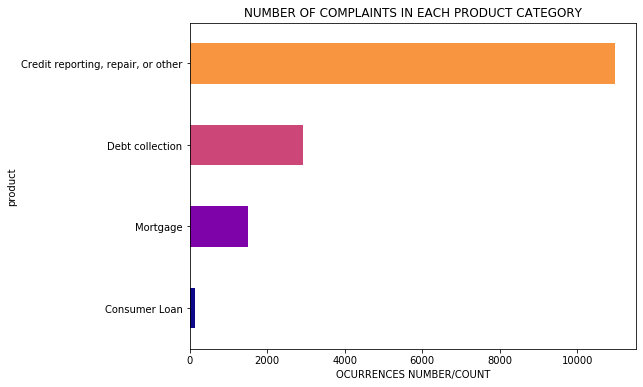

In [29]:
fig = plt.figure(figsize=(8,6))

cmap = plt.get_cmap('plasma')

# Define the number of colors needed (number of product categories)
num_colors = len(df2['product'].unique())

# Create a list of colors from the colormap
colors = [cmap(i / num_colors) for i in range(num_colors)]

df2.groupby('product').complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY')
plt.xlabel('OCURRENCES NUMBER/COUNT', fontsize = 10);


In [30]:
df2['product'].value_counts()

Credit reporting, repair, or other    10966
Debt collection                        2938
Mortgage                               1512
Consumer Loan                           145
Name: product, dtype: int64

# Text Pre-processing

In [31]:
# FEATURE EXTRACTION USING Term Frequency-Inverse Document Frequency (TFIDF)

In [32]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
# Converting the sparse matrix to a dense one to visualize it by using ".toarray"

features = tfidf.fit_transform(df2.complaint).toarray()
labels = df2.category_id
print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 15561 complaints is represented by 34223 features (TF-IDF score of unigrams and bigrams)


In [33]:
#FEATURE SELECTION USING Chi-square test

In [34]:
from sklearn.feature_selection import SelectKBest, chi2

# Create a SelectKBest object

n_features = 100
ch2 = SelectKBest(chi2, k=n_features)

# Iterate through each product category
for product, category_id in sorted(category_to_id.items()):
    
    # Calculate chi-squared statistics for the features of this category
    
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    
    # Extract the most correlated unigrams and bigrams
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    # Select the top 'n_features' features using SelectKBest
    
    # X_train_sp = ch2.fit_transform(features, labels == category_id)
    
    print("Category: %s" % (product))
    print( )
    print("  * Most Correlated Unigrams are: %s" % (', '.join(unigrams[-n_features:])))
    print( )
    print("  * Most Correlated Bigrams are: %s" % (', '.join(bigrams[-n_features:])))
    print()


C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category: Consumer Loan

  * Most Correlated Unigrams are: modifications, mod, close, heloc, bayview, check, trial, applied, america, underwriting, new, refinanced, refund, principle, package, weeks, increased, increase, specialized, estimate, investor, fee, officer, reporting, transferred, hamp, refinancing, hud, analysis, options, approved, application, appraiser, credit, income, value, months, homeowner, report, borrower, deed, loss, chase, pay, select, caliber, told, fees, month, extra, shellpoint, tax, equity, loancare, mitigation, insurance, carrington, process, shortage, forbearance, homeowners, phh, freedom, sps, payoff, fha, ditech, foreclose, bank, mr, monthly, cooper, sls, payment, house, payments, funds, pmi, short, nationstar, principal, lender, rate, refinance, taxes, sale, fargo, servicer, wells, closing, appraisal, ocwen, servicing, foreclosure, property, home, loan, escrow, modification, mortgage

  * Most Correlated Bigrams are: modification request, mortgage account,

C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category: Credit reporting, repair, or other

  * Most Correlated Unigrams are: payoff, attorney, sold, office, voicemail, collections, nationstar, paying, cell, hospital, mr, husband, 611, threatened, medical, trying, month, money, written, bureaus, refinance, monthly, management, paid, act, inquiry, fair, information, principal, harassing, remove, servicer, threatening, portfolio, ocwen, xxxxxxxx, llc, appraisal, taxes, fees, received, rights, closing, rate, bank, fargo, payment, asked, wells, work, house, violated, funds, owed, transunion, stop, sale, instructions, collector, experian, accordance, 604, 602, servicing, insurance, credit, said, recovery, inaccurate, company, furnish, equifax, foreclosure, privacy, inquiries, states, consumer, items, 15, report, called, collection, accounts, phone, owe, calls, calling, property, 1681, home, escrow, told, reporting, section, modification, loan, pay, collect, mortgage, debt

  * Most Correlated Bigrams are: person shall, report containin

C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category: Debt collection

  * Most Correlated Unigrams are: took, registration, check, 2014, month, yes, complicated, demeaning, financial, miles, rip, limits, dime, draft, refund, bank, partially, deaf, dollars, arrange, deduct, payments, dangerous, principle, displaced, wellsfargo, cent, penalized, beg, worth, shady, nfcu, payment, settling, endorsements, chrysler, sorry, honoring, pay, arranged, title, harris, capitol, 2016, manually, calling, finance, cashing, leases, summit, increases, deceived, purchased, warn, ach, white, 2015, storage, automatic, regions, payoff, endorsed, realistic, vin, towing, load, mississippi, bmw, discontinued, repossession, rise, repossessed, auto, cosigned, register, dmv, valued, ally, fee, van, lease, leased, deceive, loan, lemon, gm, westlake, financed, exeter, repo, apr, ford, dealership, dealer, toyota, nissan, santander, surrender, vehicle, car

  * Most Correlated Bigrams are: westlake financial, car note, return car, requested company, refund ch

C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Category: Mortgage

  * Most Correlated Unigrams are: voice, funding, scam, rights, collectors, commonwealth, office, trying, threaten, client, violated, enhanced, repeated, parents, alleged, asked, judgement, credence, firm, bills, garnish, wages, lvnv, xxxxxxxx, report, inquiry, debit, solutions, attempting, rude, fdcpa, harassed, late, hung, contract, transworld, transunion, caller, afni, received, communication, garnishment, said, harass, harassment, accordance, mortgage, experian, instructions, told, served, collecting, 602, inaccurate, 604, desist, erc, furnish, consumer, voicemail, privacy, debts, equifax, cease, llc, pay, 15, associates, inquiries, accounts, states, reporting, threatened, items, portfolio, threatening, management, cell, called, midland, stop, systems, 1681, harassing, section, medical, hospital, validation, company, owed, collections, phone, calls, collector, calling, recovery, owe, collect, collection, debt

  * Most Correlated Bigrams are: usc 1681, years ago

# Train and test data splite

In [35]:
X = df2['complaint'] 
y = df2['product'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)

In [36]:
# DO FIND THE GOOD MODEL BY USING CROSS VALIDATION

In [37]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,multi_class='auto',solver='lbfgs'),
]
from joblib import Parallel, delayed

def train_and_evaluate(model, features, labels):
    model_name = model.__class__.__name__
    accuracy = cross_val_score(model, features, labels, scoring='accuracy', cv=5)
    print(f"Model: {model_name}, Mean Accuracy: {accuracy.mean()}")


for model in models:
    train_and_evaluate(model, features, labels)
    del model


Model: RandomForestClassifier, Mean Accuracy: 0.7048390240115875
Model: LinearSVC, Mean Accuracy: 0.9088749022467354
Model: MultinomialNB, Mean Accuracy: 0.8822060981521226


C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Riya Das\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Model: LogisticRegression, Mean Accuracy: 0.9050837065230226


In [38]:
Eval = {'Model_Name': ['LINEAR-SVC','LOGISTIC REGRESSION','MultinomialMULTINOMIAL NAIVE BAYES','RANDOMFOREST CLASSIFIER',],
'MEAN_ACCURACY': [0.9089390343063473,0.9048909129049975,0.8821422907712438,0.7048390906827228]
       }
Eval_model = pd.DataFrame(Eval)
print(Eval_model)

                           Model_Name  MEAN_ACCURACY
0                          LINEAR-SVC       0.908939
1                 LOGISTIC REGRESSION       0.904891
2  MultinomialMULTINOMIAL NAIVE BAYES       0.882142
3             RANDOMFOREST CLASSIFIER       0.704839


In [39]:
# SO FROM ABOVE WE CAN PREDICT THAT Linear Support Vector Machine WORKS THE BEST FOR MY DATASET SO DO THE FEARTHER PROCESS BY USING THIS MODEL

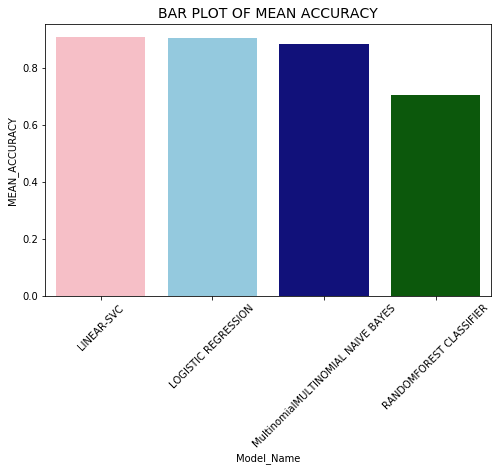

In [40]:
plt.figure(figsize=(8, 5))
color2=["LightPink","SkyBlue","DarkBlue","DarkGreen"]
sns.barplot(x='Model_Name', y='MEAN_ACCURACY', 
            data=Eval_model, 
            palette=color2)
plt.title("BAR PLOT OF MEAN ACCURACY", size=14)
plt.xticks(rotation=45)
plt.show()

# Evaluation of Text Classification Model

In [41]:
# Now We are fitting the best model in our new test data set based on feature and lavels

In [42]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.20, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Linear Support Vector Machine is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of the Linear Support Vector Machine is:  0.9007388371345969


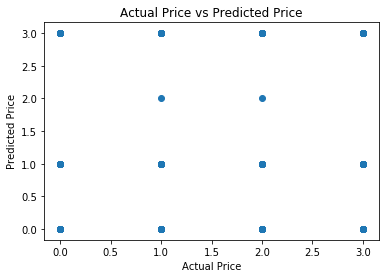

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

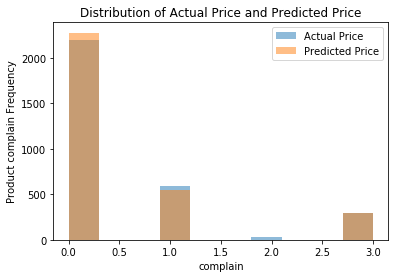

In [44]:
plt.hist(y_test, bins=10, alpha=0.5, label='Actual Price')
plt.hist(y_pred, bins=10, alpha=0.5, label='Predicted Price')
plt.xlabel('complain')
plt.ylabel('Product complain Frequency')
plt.title('Distribution of Actual Price and Predicted Price')
plt.legend()
plt.show()

In [45]:
# Show Classification Report

In [46]:
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['product'].unique()))

CLASSIFICATIION METRICS
                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.92      0.96      0.94      2193
                          Mortgage       0.81      0.74      0.78       596
                   Debt collection       0.50      0.03      0.06        32
                     Consumer Loan       0.90      0.89      0.89       292

                          accuracy                           0.90      3113
                         macro avg       0.78      0.66      0.67      3113
                      weighted avg       0.89      0.90      0.90      3113



In [47]:
# Confusion Matric

[[2100   81    0   12]
 [ 142  444    1    9]
 [  15    7    1    9]
 [  18   15    0  259]]


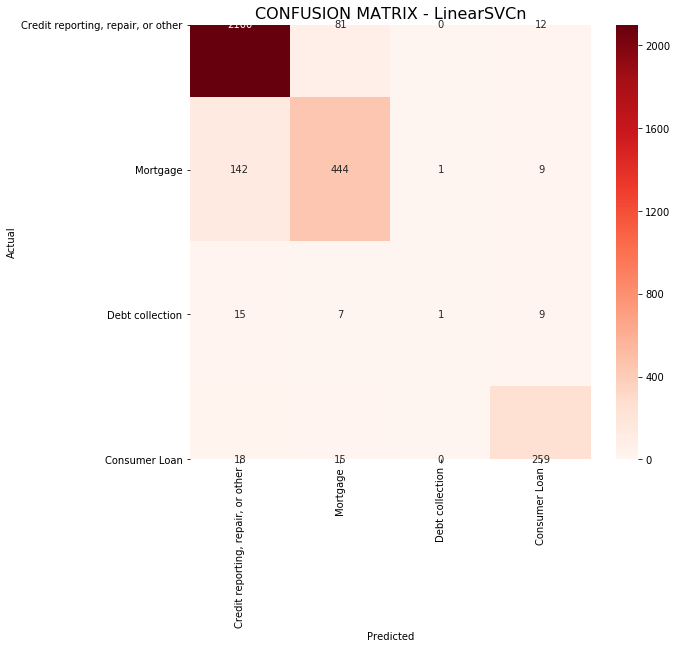

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=category_id_df['product'].values, 
            yticklabels=category_id_df['product'].values)

# ax.set_xlabel('Predicted labels',size=15)
# ax.set_ylabel('Actual labels',size=15)
# ax.set_title("CONFUSION MATRIX - LinearSVCn", size=20);

print(conf_mat)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Credit reporting, repair, or other', 'Mortgage',
#        'Debt collection', 'Consumer Loan'])
# cm_display.plot()

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

#  PREDICTION

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)

tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model3 = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

complaint = """I have received over 27 emails from XXXX XXXX who is a representative from Midland Funding LLC. 
From XX/XX/XXXX I received approximately 6 emails. From XX/XX/XXXX I received approximately 6 emails. 
From XX/XX/XXXX I received approximately 9 emails. From XX/XX/XXXX I received approximately 6 emails. 
All emails came from the same individual, XXXX XXXX. It is becoming a nonstop issue of harassment."""

print(model3.predict(fitted_vectorizer.transform([complaint])))

['Debt collection']
